In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
%matplotlib inline 
import plotly.express as px
import plotly.graph_objs as go

In [3]:
dataset = pd.read_csv('./Data/ford.csv')
df = dataset.copy()

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


<Axes: >

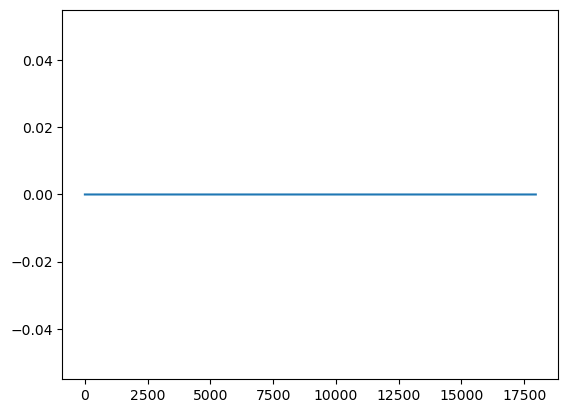

In [7]:
df.isnull().sum(axis=1).plot()

In [38]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [77]:
import pandas as pd

def check_and_extract_issues(df):
    """
    Checks a DataFrame for NaN values, zero values, and duplicate rows,
    then extracts the rows corresponding to each issue into separate DataFrames.
    
    Parameters:
    - df: DataFrame to check
    
    Returns:
    - nan_rows: DataFrame with rows containing NaN values
    - zero_rows: DataFrame with rows containing zero values
    - duplicate_rows: DataFrame with duplicate rows
    """
    # Extract rows with NaN values
    nan_rows = df[df.isna().any(axis=1)]
    
    # Extract rows with zero values
    zero_rows = df[(df == 0).any(axis=1)]
    
    # Extract duplicate rows
    duplicate_rows = df[df.duplicated(keep=False)]
    
    return nan_rows, zero_rows, duplicate_rows

nan_df, zero_df, duplicate_df = check_and_extract_issues(df)


In [69]:
#zero_df = zero_df.set_index('year')
zero_df = zero_df.sort_index()

In [75]:
zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2197 entries, 12 to 17952
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         2197 non-null   object 
 1   year          2197 non-null   int64  
 2   price         2197 non-null   int64  
 3   transmission  2197 non-null   object 
 4   mileage       2197 non-null   int64  
 5   fuelType      2197 non-null   object 
 6   tax           2197 non-null   int64  
 7   mpg           2197 non-null   float64
 8   engineSize    2197 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 171.6+ KB


In [73]:
zero_engine_size_rows = df[df['tax'] == 0]

# Display the rows
zero_engine_size_rows.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2153 entries, 12 to 17952
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         2153 non-null   object 
 1   year          2153 non-null   int64  
 2   price         2153 non-null   int64  
 3   transmission  2153 non-null   object 
 4   mileage       2153 non-null   int64  
 5   fuelType      2153 non-null   object 
 6   tax           2153 non-null   int64  
 7   mpg           2153 non-null   float64
 8   engineSize    2153 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 168.2+ KB


In [58]:
# Checking for Duplicates
if df.duplicated().sum() > 0:
    print("Duplicate exits")
else:
    print("No duplicates")

Duplicate exits


In [79]:
df = df.drop_duplicates(keep='first')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   price         17812 non-null  int64  
 3   transmission  17812 non-null  object 
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  object 
 6   tax           17812 non-null  int64  
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


Top ten cars:

model
Fiesta         6557
Focus          4588
Kuga           2225
EcoSport       1143
C-MAX           543
Ka+             531
Mondeo          526
B-MAX           355
S-MAX           296
Grand C-MAX     247
Name: count, dtype: int64


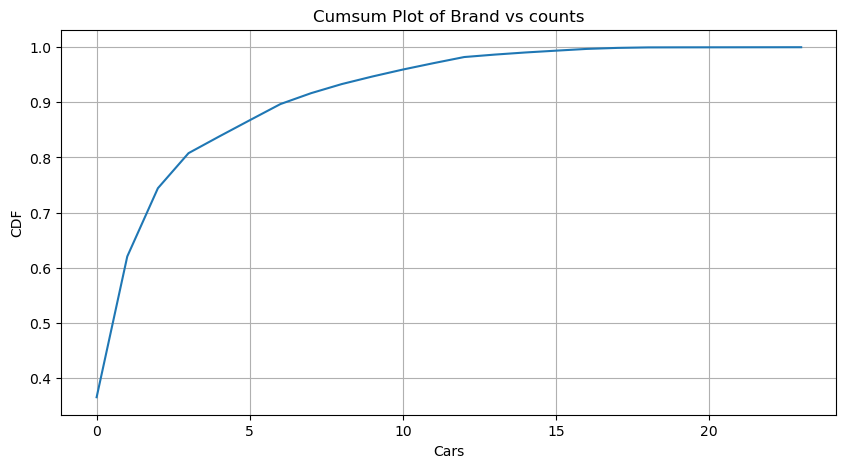

In [9]:
print("Top ten cars:\n")
print(df.model.value_counts().head(10))

y = df.model.value_counts(normalize=True).cumsum()
x = len(y)

plt.figure(figsize=(10,5))
plt.plot(range(x), y);
plt.title('Cumsum Plot of Brand vs counts')
plt.xlabel('Cars')
plt.ylabel('CDF')
plt.grid(True)

In [10]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

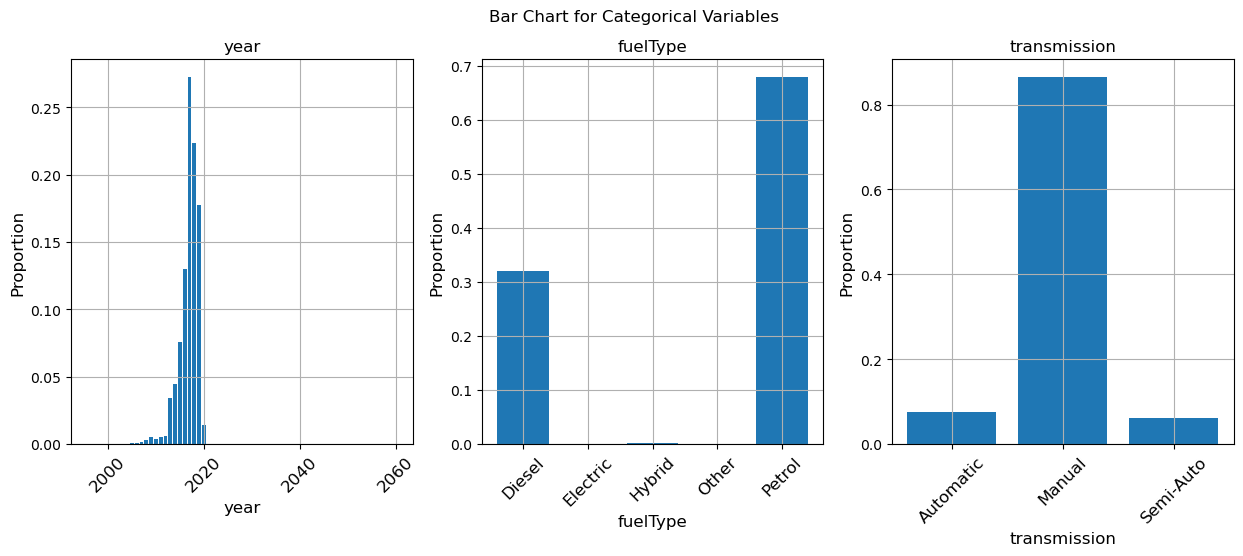

In [18]:
cat_cols = ['year', 'fuelType', 'transmission' ]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
fig.suptitle("Bar Chart for Categorical Variables", fontsize=12)
axes = axes.ravel()

# Iterate through categorical columns
for i, col in enumerate(cat_cols):
    value_counts = df[col].value_counts(normalize=True, sort=False).sort_index(ascending=True)
    axes[i].bar(value_counts.index, value_counts.values)  # Create bar plot
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Proportion', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12) 
    axes[i].grid(True) # Format x-ticks

plt.show()

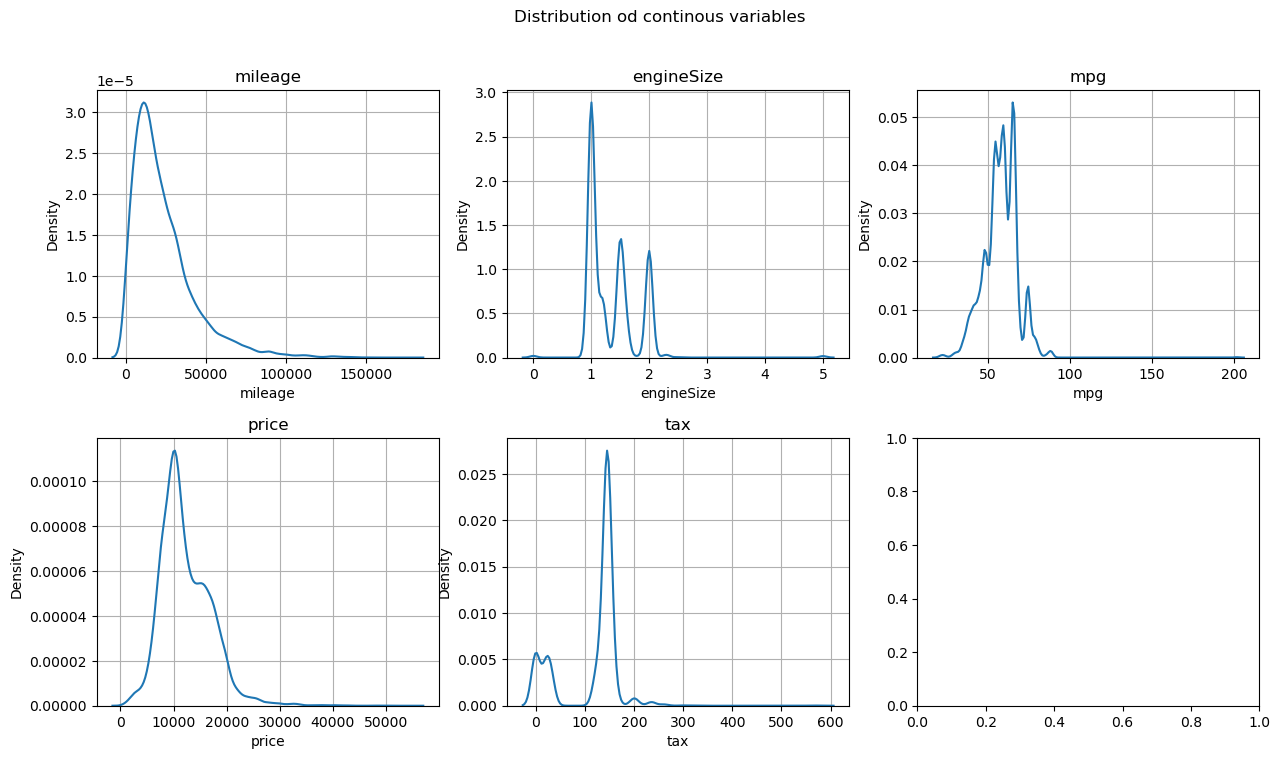

In [50]:
con_col = ['mileage','engineSize','mpg', 'price', 'tax']

fig, axes = plt.subplots(2,3, figsize=(15,8))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
fig.suptitle('Distribution od continous variables', fontsize=12)
axes = axes.ravel()

for i,col in enumerate(con_col):
    sns.kdeplot((df[col][~pd.isna(df[col])]), ax = axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].grid(True)
plt.show()

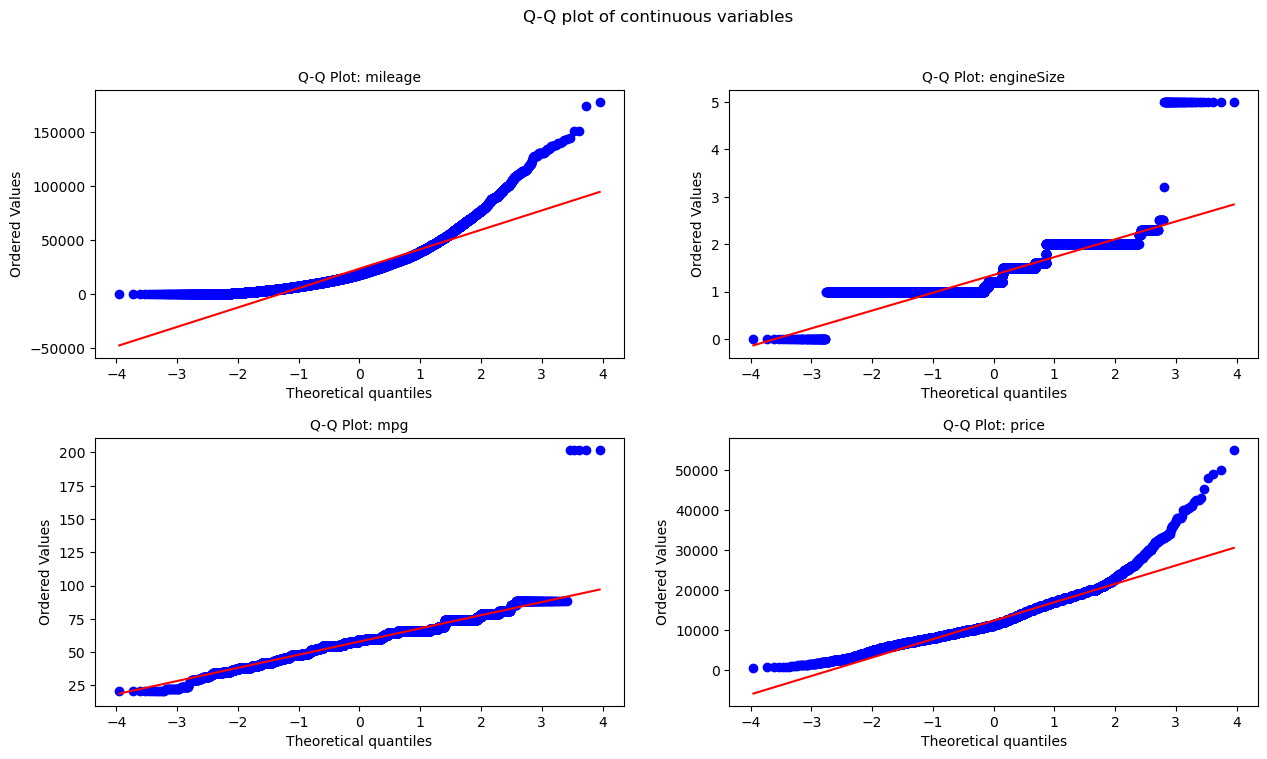

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
fig.suptitle('Q-Q plot of continuous variables', fontsize=12)
axes = axes.ravel()

for i, col in enumerate(con_col):
    res = stats.probplot(df[col][~pd.isna(df[col])], plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {col}", fontsize=10)  # Add the column name as the title

plt.show()    


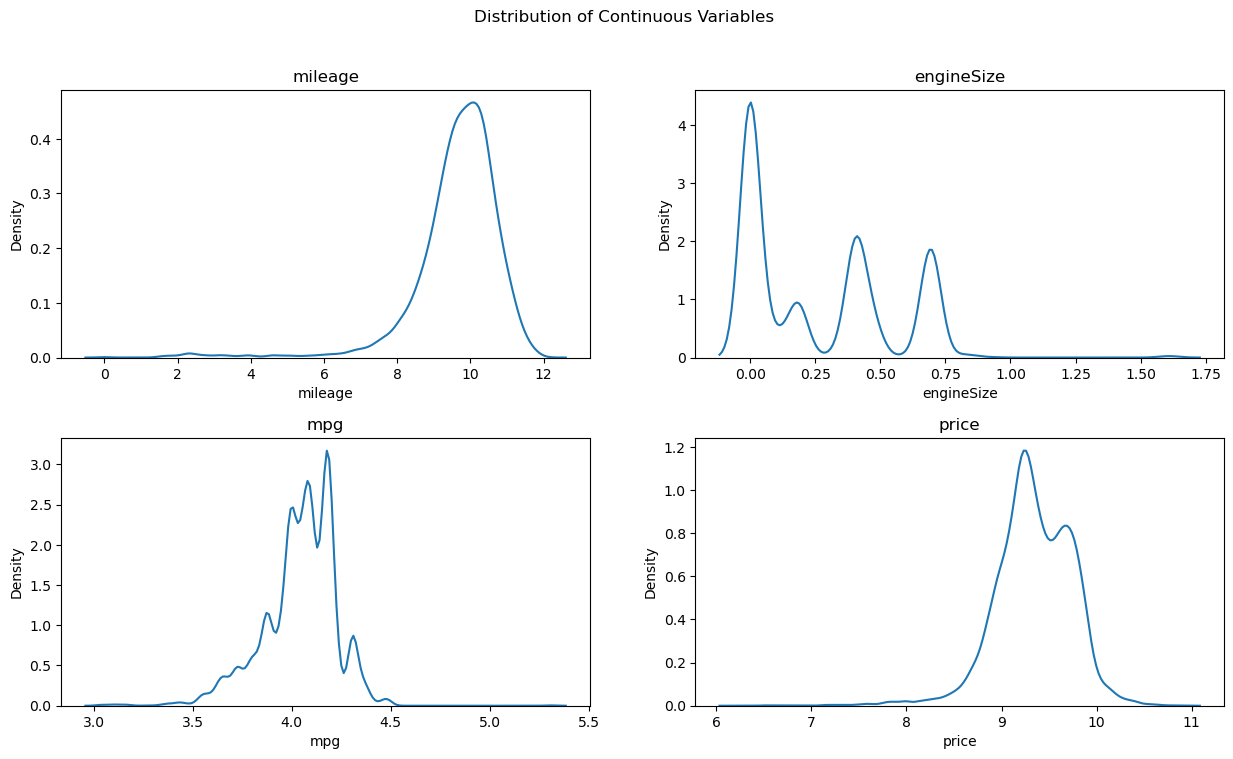

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
fig.suptitle('Distribution of Continuous Variables', fontsize=12)
axes = axes.ravel()

for i, col in enumerate(con_col):
    # Filter out missing values and apply log transformation
    valid_data = df[col].dropna()
    # Ensure there are no zero or negative values before applying log
    valid_data = valid_data[valid_data > 0]
    sns.kdeplot(np.log(valid_data), ax=axes[i])
    axes[i].set_title(col, fontsize=12)

plt.show()

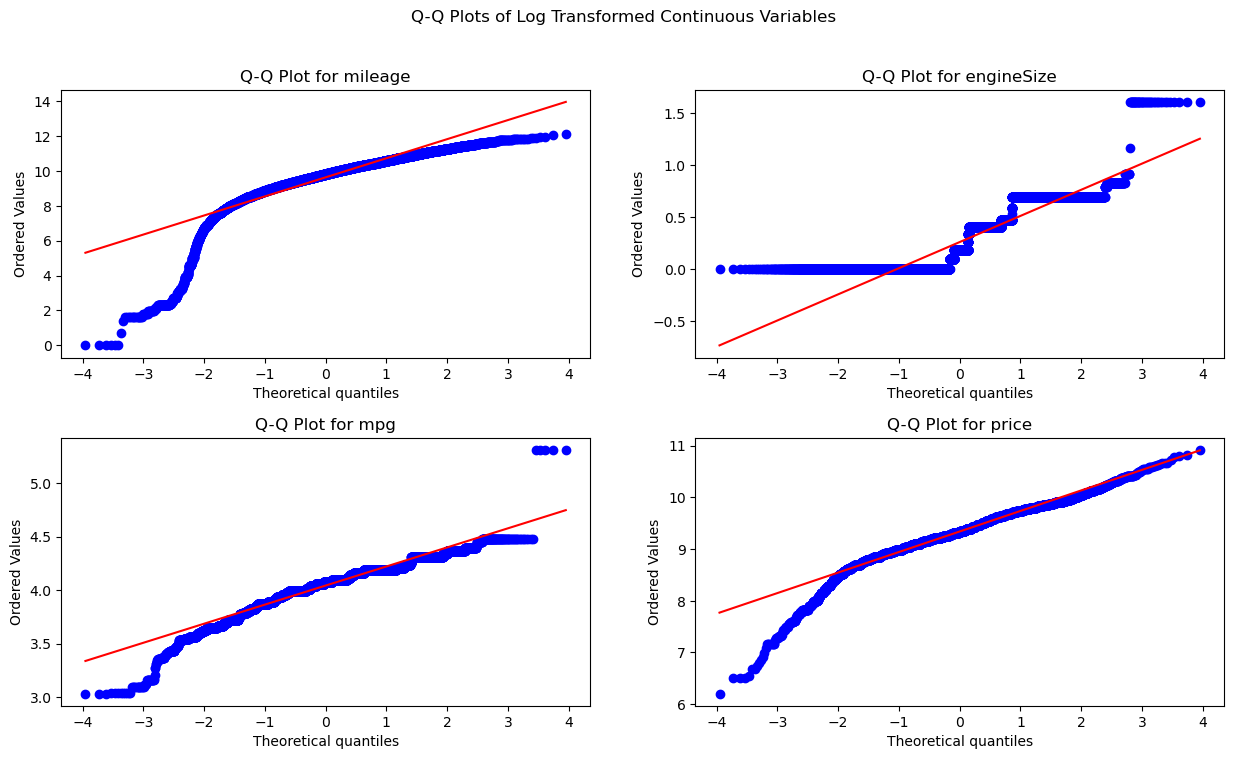

In [29]:
fig, axes = plt.subplots(2,2, figsize=(15, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
fig.suptitle('Q-Q Plots of Log Transformed Continuous Variables', fontsize=12)
axes = axes.ravel()

for i, col in enumerate(con_col):
    # Filter out missing values and apply log transformation
    valid_data = df[col].dropna()
    # Ensure there are no zero or negative values before applying log
    valid_data = valid_data[valid_data > 0]
    
    # Q-Q plot for log-transformed data
    log_transformed = np.log(valid_data)
    stats.probplot(log_transformed, dist="norm", plot=axes[i])
    
    axes[i].set_title(f'Q-Q Plot for {col}', fontsize=12)

plt.show()

Text(0.5, 1.0, 'Box plot of mileage, engineSize, mpg, price')

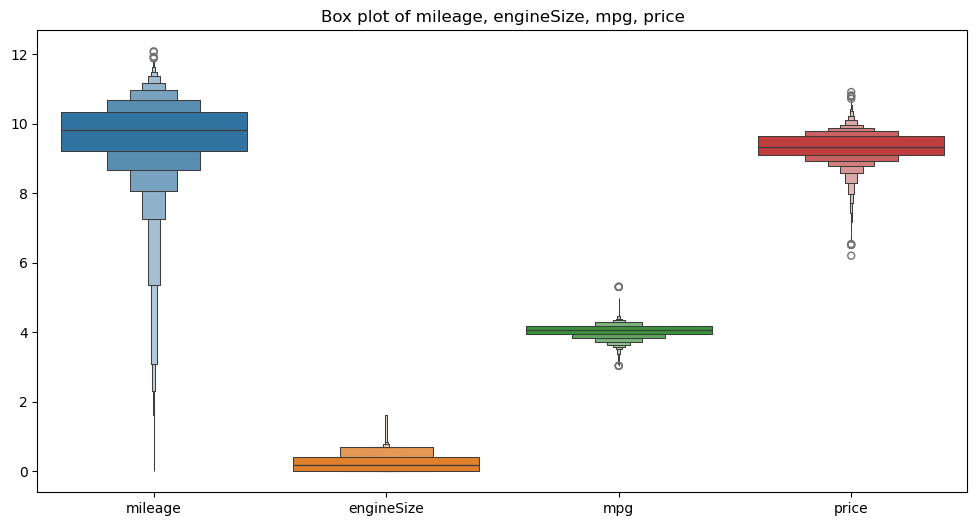

In [30]:
plt.figure(figsize=(12,6))

sns.boxenplot(data=df[con_col].apply(np.log))
plt.title("Box plot of "+", ".join(con_col))

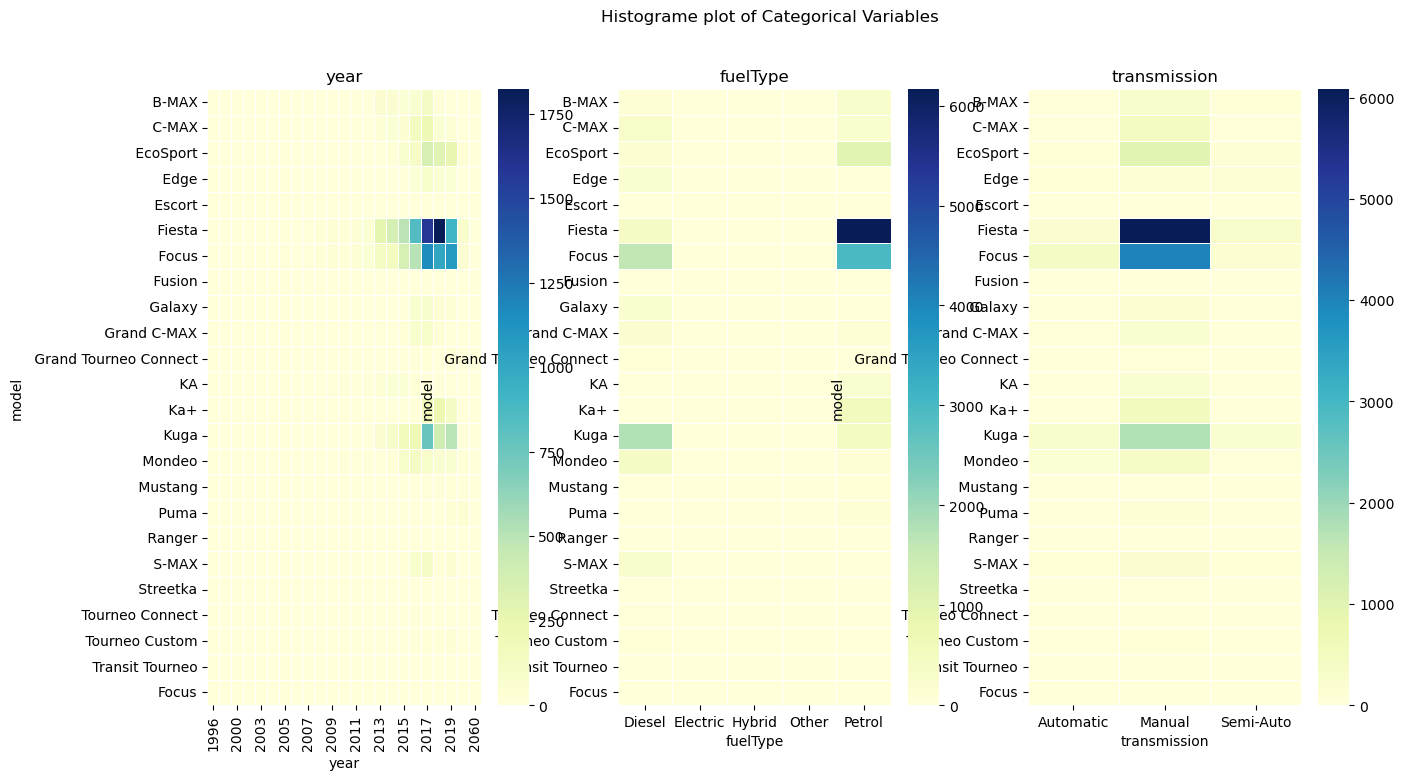

In [52]:
# Brand vs Categorical
fig, axes = plt.subplots(1,3, figsize=(15,8))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
fig.suptitle('Histograme plot of Categorical Variables', fontsize=12)
axes = axes.ravel()

for i,col in enumerate(cat_cols):
    tab = pd.crosstab(index=df.model,columns=df[col])
    sns.heatmap(tab,linewidths=0.5,cmap="YlGnBu", ax=axes[i])    
    axes[i].set_title(col, fontsize=12)    #axes[i].set_title(col,fontsize=25)
plt.show()

Text(0.5, 0.98, 'Pair plot of Band Images')

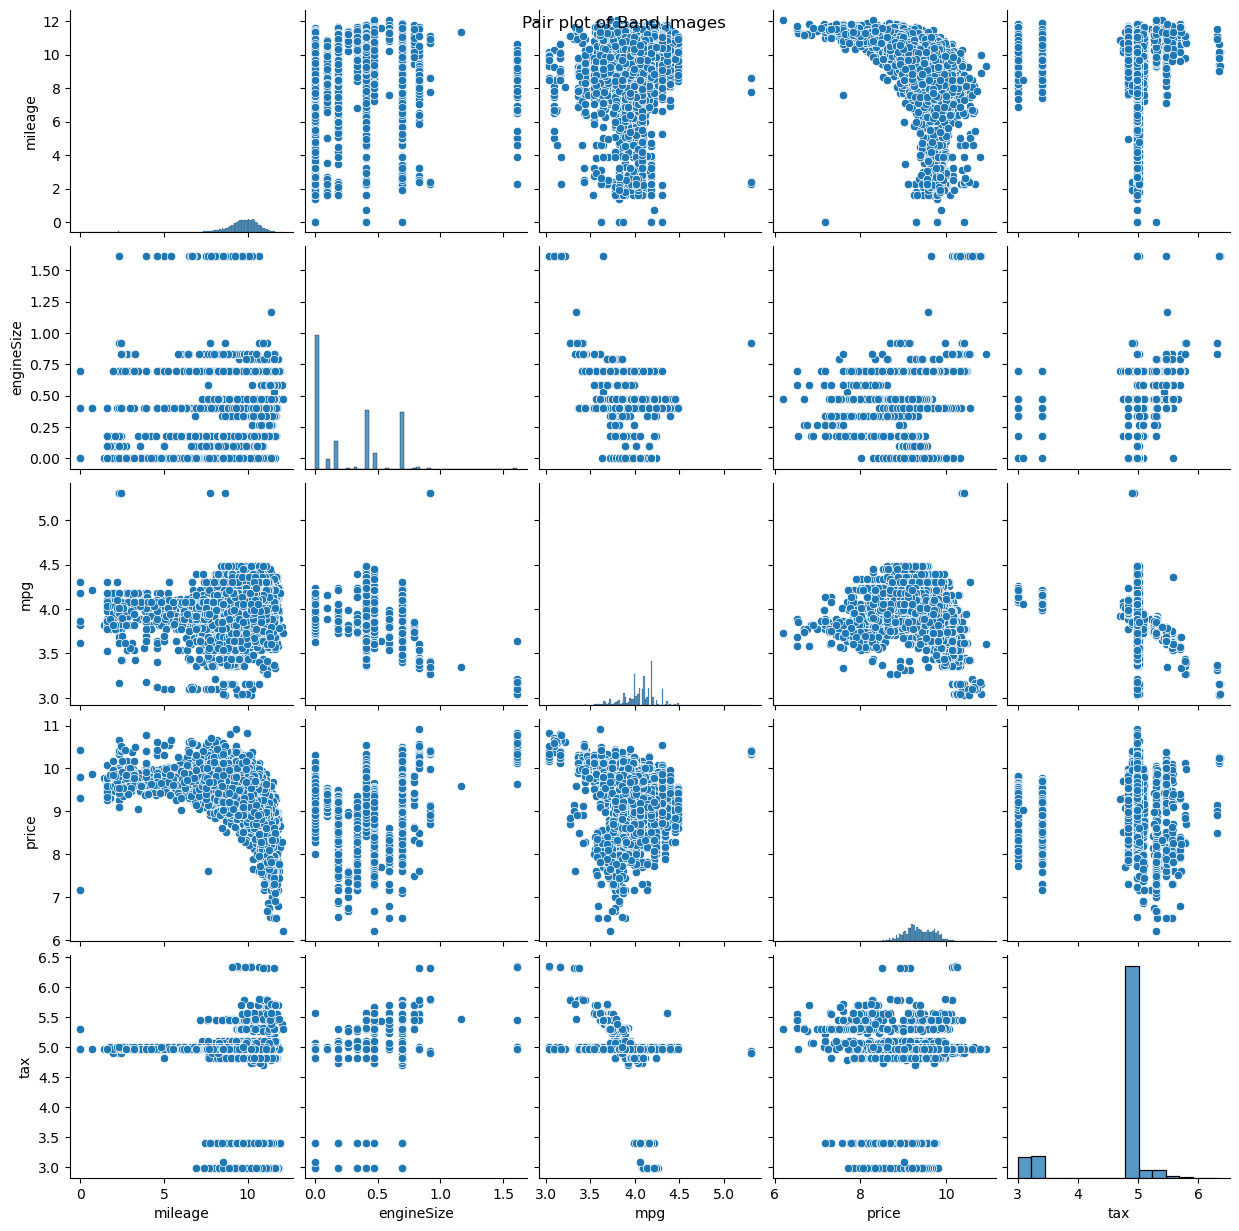

In [53]:
x = sns.pairplot(data=df[con_col].apply(np.log))

x.fig.suptitle("Pair plot of Band Images")

In [37]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [57]:
c = np.corrcoef(df['tax'],df['mileage'])
c

array([[ 1.      , -0.260451],
       [-0.260451,  1.      ]])